In [5]:
import numpy as np #Importing numpy 
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.core.problem import ElementwiseProblem #Importing problem
from pymoo.optimize import minimize #Importing objective
from pymoo.visualization.scatter import Scatter #Importing plots
import pandas as pd
import matplotlib.pyplot as plt #importing matplotlib plot
from pymoo.core.problem import Problem #Importing problem
from pymoo.problems.functional import FunctionalProblem #Importing problem

In [9]:
class MyProblem(ElementwiseProblem):

    def __init__(self, vmin=42, vmax=201, fmin=0.05, fmax=0.33, dmin=0.5, dmax=2.5):
        super().__init__(n_var=3,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([vmin, fmin, dmin]),
                         xu=np.array([vmax, fmax, dmax]))
        self.i = 1

    def f1(self, v, f, d): #objective 1
        return 0.33349*(v**0.1480)*(f**0.4912)*(d**0.2898)

    def f2(self, v, f, d): #objective 2
        return -1000*v*f*d

    def g1(self, v, f,d): #constraint 1
        return (88 * (v**0.3156) * (f**0.2856)* (d**0.2250))-500

    def g2(self, v, f, d): #constraint 2
        return (18 * (v**(-0.0757)) * (f**0.7593) * (d**0.1912))-2

    def _evaluate(self, x, out, *args, **kwargs):
        v = x[0]
        f = x[1]
        d = x[2]
        f1 = self.f1(v, f, d)
        f2 = self.f2(v, f, d)
        g1 = self.g1(v, f, d)
        g2 = self.g2(v, f, d)
        self.i += 1
        out["F"] = [f1, f2]
        out["G"] = [g1, g2]
        
problem = MyProblem()


      TW       MRR       V     F     D
0   0.24  30369.21  200.96  0.06  2.50
1   0.12   1607.98   63.85  0.05  0.50
2   0.24  31234.74  201.00  0.06  2.50
3   0.17  10090.64  200.95  0.05  1.00
4   0.20  18258.04  200.96  0.05  1.81
..   ...       ...     ...   ...   ...
86  0.18  12323.56  200.87  0.05  1.23
87  0.11   1053.02   42.06  0.05  0.50
88  0.15   7380.86  200.98  0.05  0.73
89  0.13   4067.18  160.87  0.05  0.51
90  0.24  29945.22  200.95  0.06  2.50

[91 rows x 5 columns]


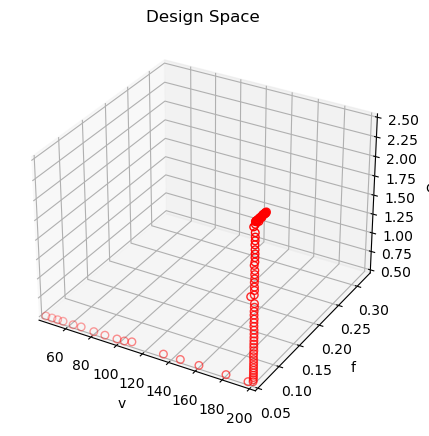

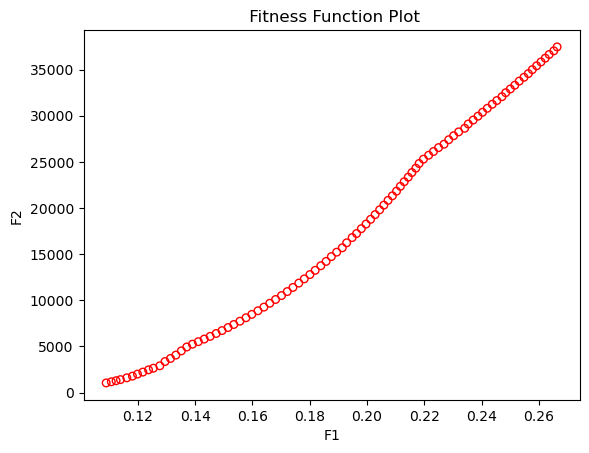

In [29]:
# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=90)
algorithm = NSGA3(pop_size=100,
                  ref_dirs=ref_dirs)
res = minimize(problem, algorithm, ("n_gen", 100), verbose=False, seed=1,save_history=True)
optimal_ip = pd.DataFrame(list(res.X))
optimal_op = pd.DataFrame(list(res.F))
result = pd.concat([optimal_op, optimal_ip], axis=1)
result.columns = ['TW', 'MRR', 'V', 'F','D']
result['MRR']=result['MRR']*-1
print(round(result.head(100),2))

from mpl_toolkits.mplot3d import Axes3D

xl, xu = problem.bounds()
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(res.X[:, 0], res.X[:, 1], res.X[:, 2], s=30, color='red',facecolors='none',edgecolors='red')
ax.set_xlim(xl[0], xu[0])
ax.set_ylim(xl[1], xu[1])
ax.set_zlim(xl[2], xu[2])
ax.set_title("Design Space")
ax.set_xlabel("v")
ax.set_ylabel("f")
ax.set_zlabel("d")
plt.show()

plt.title(" Fitness Function Plot")
plt.scatter(result.iloc[:, [0]], result.iloc[:, [1]],s = 30,color='red',facecolors='none',edgecolors='red')
plt.xlabel("F1")
plt.ylabel("F2");

